### Imports

In [1]:
from ActiveTestingRegressionMV import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

### Ishigami Function

In [2]:
rng = np.random.RandomState(2)

N = 60
data_max, data_min = np.pi, -np.pi
len_data = (data_max - data_min)

data = np.zeros((N, 3))
for c in range(3):
    data[:,c] = np.sort(rng.rand(N) * len_data - len_data / 2)

noise = rng.randn(N) * 0.1
target = np.sin(data[:,0]) + 7 * np.sin(data[:,1])**2 + 0.1 * data[:,2] ** 4 * np.sin(data[:,0]) +  noise

X, y = data, target 

# D_train and D_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=15) # 11

In [3]:
# learner  
reg_learner = Pipeline([
            ("polynomial_features", PolynomialFeatures(degree=5, include_bias=False)),
            ("std", StandardScaler()),
            ("linear_regression", Ridge())])


reg_learner.fit(X_train, y_train)

y_pred = reg_learner.predict(X_test)

### Regression NN (No Dropout)

Trial 30 Complete [00h 00m 02s]
mean_squared_error: 4.343928813934326

Best mean_squared_error So Far: 3.9591028690338135
Total elapsed time: 00h 00m 55s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 192)               768       
                                                                 
 dense_5 (Dense)             (None, 96)                18528     
                                                                 
 dense_6 (Dense)             (None, 480)               46560     
                                                                 
 dense_7 (Dense)             (None, 480)               230880    
                                                                 
 dense_8 (Dense)             (None, 512)               246272    
                                                                 
 dense_9 (Dense)             (No

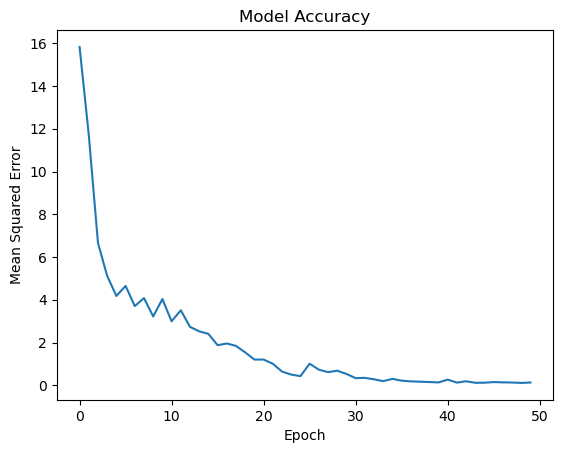

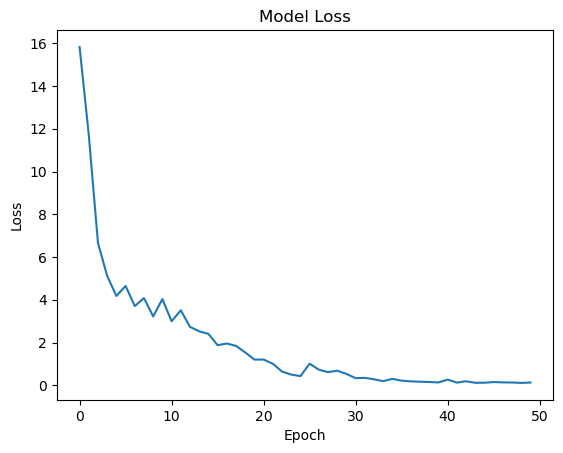

In [4]:
# Tune for data using gridsearch and create model
reg_evaluator = create_model(X_train, y_train, model_type = "boot", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Bootstrap Surrogate Sampling

---3---
1/1 [==============================] - 0s 13ms/step
---6---
1/1 [==============================] - 0s 16ms/step
---9---
1/1 [==============================] - 0s 16ms/step
---12---
1/1 [==============================] - 0s 19ms/step
---15---
1/1 [==============================] - 0s 32ms/step


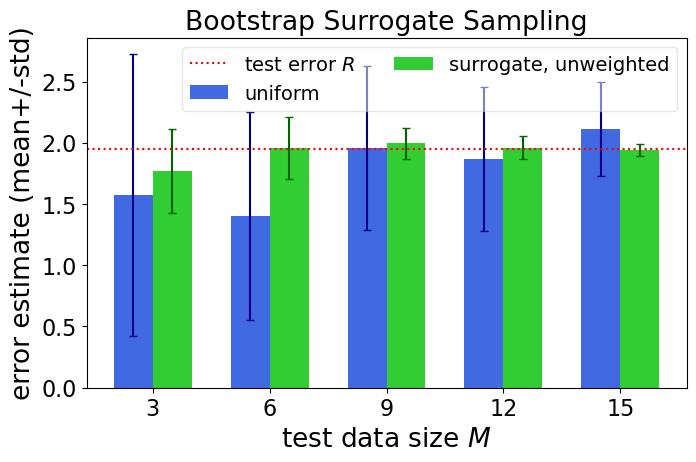

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
3,1.570019,1.151400,1.770844,0.340642
6,1.402290,0.845465,1.960773,0.253066
9,1.957225,0.666818,1.996503,0.127428
12,1.866105,0.589683,1.960963,0.092802
15,2.111281,0.386446,1.944334,0.049353


Full Test R Value: 1.9496385904624083


In [5]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 30, n_reps = 30, model_type = "boot", plot_title = "Bootstrap")

### Dropout Regression Model

Trial 30 Complete [00h 00m 03s]
mean_squared_error: 9.437896728515625

Best mean_squared_error So Far: 5.1444525718688965
Total elapsed time: 00h 01m 11s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               1024      
                                                                 
 lambda_6 (Lambda)           (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 448)               115136    
                                                                 
 lambda_7 (Lambda)           (None, 448)               0         
                                                                 
 dense_9 (Dense)             (None, 352)               158048    
                                                                 
 lambda_8 (Lambda)           (No

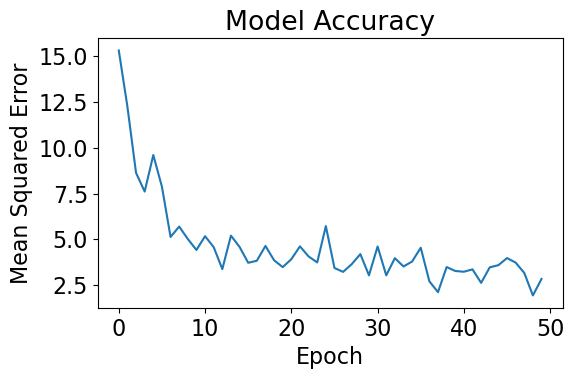

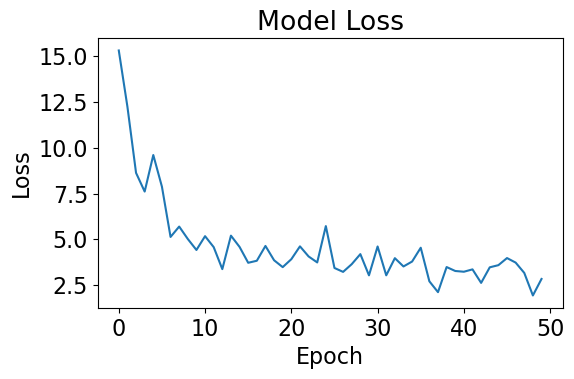

In [9]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "drop", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Dropout Surrogate Sampling

---3---
1/1 [==============================] - 0s 16ms/step
---6---
1/1 [==============================] - 0s 19ms/step
---9---
1/1 [==============================] - 0s 30ms/step
---12---
1/1 [==============================] - 0s 2ms/step
---15---
1/1 [==============================] - 0s 22ms/step


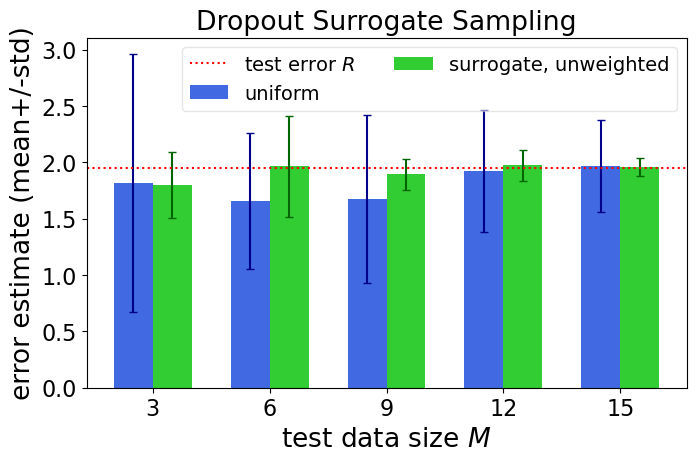

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
3,1.815212,1.141861,1.796819,0.291238
6,1.656170,0.602204,1.963369,0.450444
9,1.677805,0.744464,1.894463,0.136847
12,1.922829,0.538859,1.973877,0.137570
15,1.966693,0.410570,1.955703,0.080818


Full Test R Value: 1.9496385904624083


In [10]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "drop", n_reps = 30, num_exp = 30, plot_title = "Dropout")

### Probabilistic Layer Regression Model

Trial 30 Complete [00h 00m 03s]
mean_squared_error: 5.534204006195068

Best mean_squared_error So Far: 3.747516632080078
Total elapsed time: 00h 01m 22s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               1024      
                                                                 
 dense_10 (Dense)            (None, 448)               115136    
                                                                 
 dense_11 (Dense)            (None, 512)               229888    
                                                                 
 dense_12 (Dense)            (None, 416)               213408    
                                                                 
 dense_13 (Dense)            (None, 512)               213504    
                                                                 
 dense_14 (Dense)            (Non

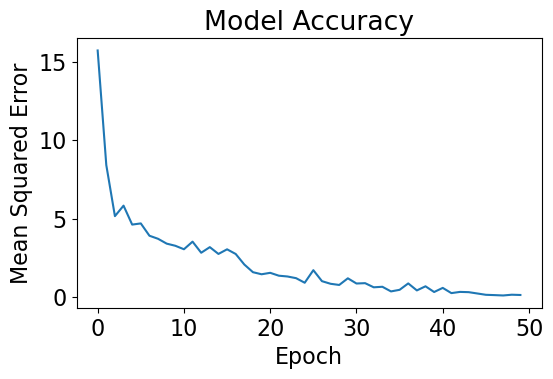

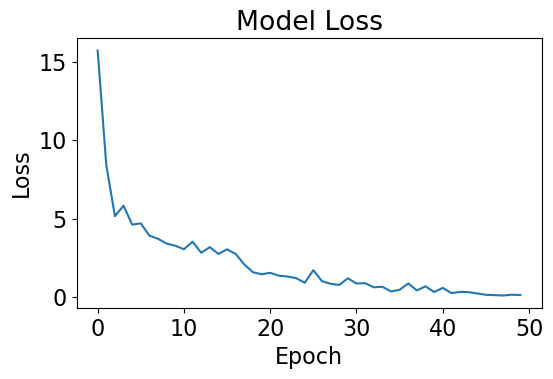

In [11]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "prob", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Probabilistic Layer Surrogate Sampling

---3---
1/1 [==============================] - 0s 17ms/step
---6---
1/1 [==============================] - 0s 31ms/step
---9---
1/1 [==============================] - 0s 27ms/step
---12---
1/1 [==============================] - 0s 17ms/step
---15---
1/1 [==============================] - 0s 9ms/step


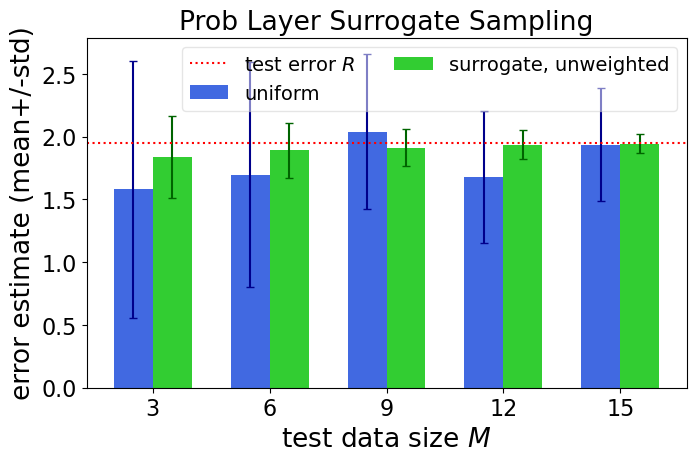

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
3,1.581629,1.022234,1.837786,0.328354
6,1.697240,0.898775,1.890814,0.219931
9,2.038344,0.617075,1.913622,0.148837
12,1.677351,0.523354,1.937375,0.115509
15,1.935394,0.450593,1.945113,0.072234


Full Test R Value: 1.9496385904624083


In [12]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type = "prob", num_exp = 30, plot_title = "Prob Layer")

### Variational Inference Regression Model

In [13]:
def build_vi(X_train, y_train):
    reg_evaluator = Sequential([
    tfpl.DenseVariational(units=2,
                          make_prior_fn = prior_trainable,
                          make_posterior_fn = posterior_mean_field,
                          kl_weight=1/X_train.shape[0], 
                          activation='sigmoid'),
    tfpl.DenseVariational(units=tfpl.IndependentNormal.params_size(1),
                          make_prior_fn=prior_trainable,
                          make_posterior_fn=posterior_mean_field,
                          kl_weight=1/X_train.shape[0]),
    tfpl.DistributionLambda(
        lambda t: tfd.Normal(loc=t[..., :1],
                            scale=1e-3 + tf.math.softplus(0.01 * t[...,1:]))),
    ])

    reg_evaluator.compile(loss=negloglik, optimizer=RMSprop(learning_rate=0.01))
    reg_evaluator.fit(X_train, y_train, epochs=10000, verbose=False)
    reg_evaluator.summary()

    return reg_evaluator

In [14]:
reg_evaluator = build_vi(X_train, y_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational (DenseVa  (None, 2)                 24        
 riational)                                                      
                                                                 
 dense_variational_1 (Dense  (None, 2)                 18        
 Variational)                                                    
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---3---
1/1 [==============================] - 0s 17ms/step
---6---
1/1 [==============================] - 0s 17ms/step
---9---
1/1 [==============================] - 0s 17ms/step
---12---
1/1 [==============================] - 0s 16ms/step
---15---
1/1 [==============================] - 0s 17ms/step


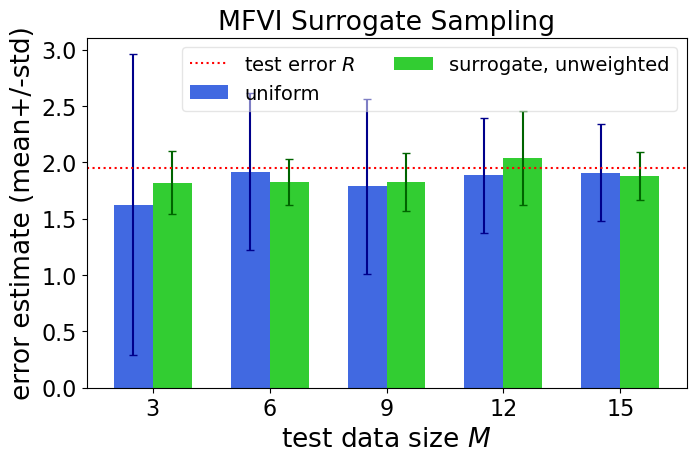

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
3,1.622757,1.335346,1.819784,0.279627
6,1.916196,0.695983,1.827614,0.202913
9,1.789154,0.776106,1.822872,0.258269
12,1.884006,0.508103,2.041590,0.416973
15,1.908953,0.429610,1.879165,0.213726


Full Test R Value: 1.9496385904624083


In [15]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type ="vi", num_exp = 30, plot_title = "MFVI")